In [1]:
from models import cnn_trad_fpool3

In [2]:
model = cnn_trad_fpool3()

In [3]:
model.summary()

Model: "cnn-trad-fpool3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36, 40, 1)]       0         
_________________________________________________________________
conv_1a (Conv2D)             (None, 36, 40, 64)        15424     
_________________________________________________________________
relu_1a (ReLU)               (None, 36, 40, 64)        0         
_________________________________________________________________
bnorm_1a (BatchNormalization (None, 36, 40, 64)        256       
_________________________________________________________________
dropout_1a (Dropout)         (None, 36, 40, 64)        0         
_________________________________________________________________
mpool_1a (MaxPooling2D)      (None, 36, 13, 64)        0         
_________________________________________________________________
conv_2a (Conv2D)             (None, 36, 13, 64)    

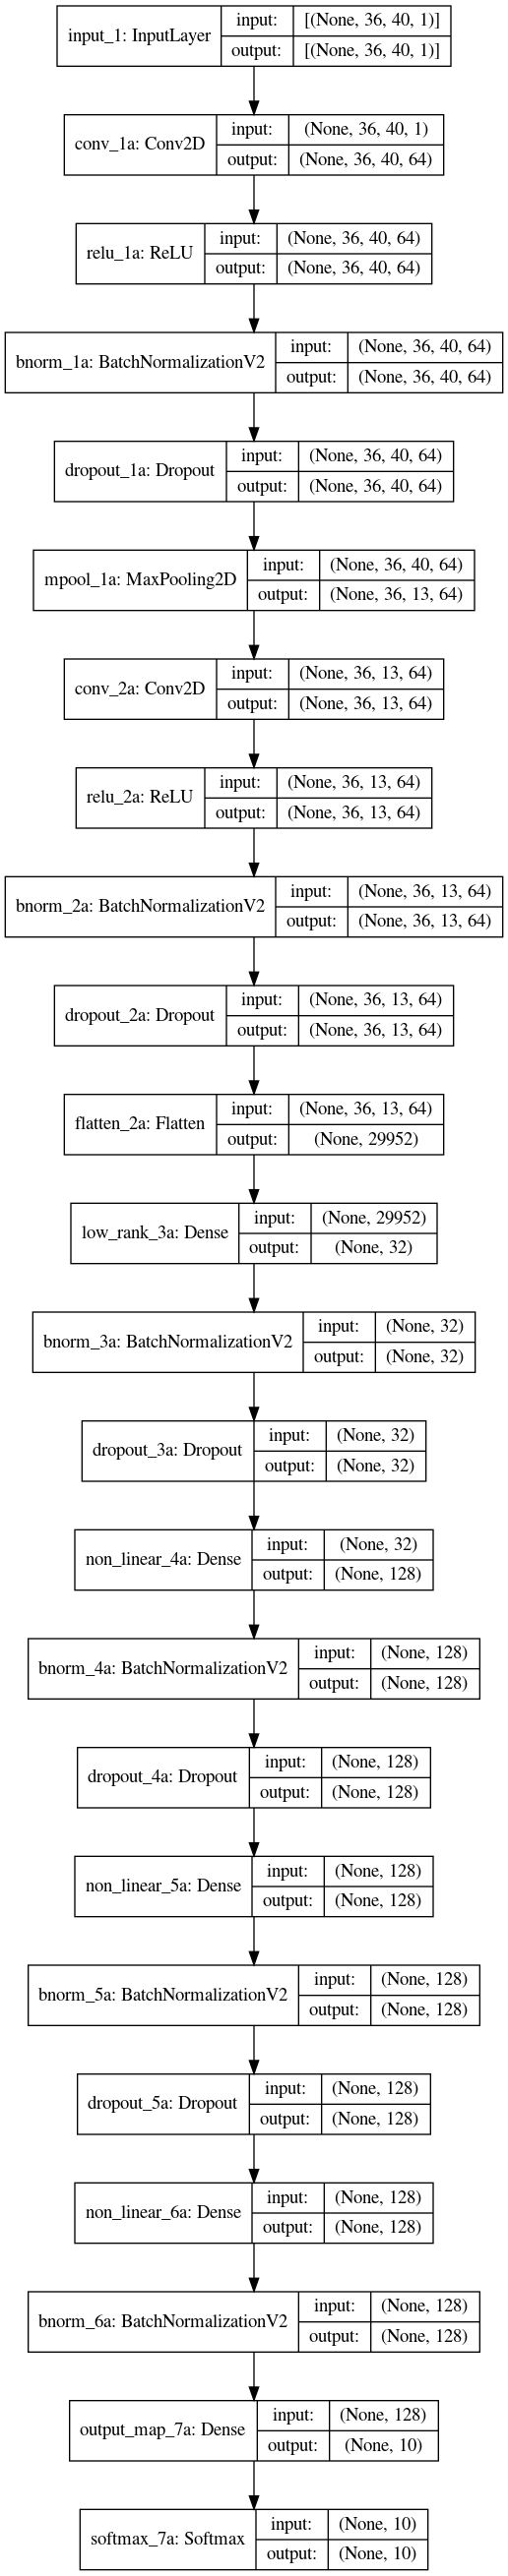

In [4]:
plot_model(model,show_shapes=True)

In [5]:
%timeit model.predict(np.random.rand(1,*INPUT_SHAPE))

18.7 ms ± 3.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
X = np.load("../../dataset/X_down.npy")
Y = np.load("../../dataset/Y_down.npy")

In [7]:
X = np.append(arr=X,values=np.load("../../dataset/X_left.npy"),axis=0)
Y = np.append(arr=Y,values=np.load("../../dataset/Y_left.npy"))
X = np.append(arr=X,values=np.load("../../dataset/X_marvin.npy"),axis=0)
Y = np.append(arr=Y,values=np.load("../../dataset/Y_marvin.npy"))
X = np.append(arr=X,values=np.load("../../dataset/X_nora.npy"),axis=0)
Y = np.append(arr=Y,values=np.load("../../dataset/Y_nora.npy"))
X = np.append(arr=X,values=np.load("../../dataset/X_off.npy"),axis=0)
Y = np.append(arr=Y,values=np.load("../../dataset/Y_off.npy"))
X = np.append(arr=X,values=np.load("../../dataset/X_on.npy"),axis=0)
Y = np.append(arr=Y,values=np.load("../../dataset/Y_on.npy"))
X = np.append(arr=X,values=np.load("../../dataset/X_right.npy"),axis=0)
Y = np.append(arr=Y,values=np.load("../../dataset/Y_right.npy"))
X = np.append(arr=X,values=np.load("../../dataset/X_stop.npy"),axis=0)
Y = np.append(arr=Y,values=np.load("../../dataset/Y_stop.npy"))
X = np.append(arr=X,values=np.load("../../dataset/X_unknown.npy"),axis=0)
Y = np.append(arr=Y,values=np.load("../../dataset/Y_unknown.npy"))
X = np.append(arr=X,values=np.load("../../dataset/X_up.npy"),axis=0)
Y = np.append(arr=Y,values=np.load("../../dataset/Y_up.npy"))

In [8]:
def normalize(arr):
    amin = arr.min()
    amax = arr.max()
    
    arr -= amin
    arr /= (amax - amin)
    
    print(amin, amax)

def shuffle_unison(arg, *other_args):

    args = (arg, *other_args)
    state = np.random.get_state()
    for argument in args:
        np.random.set_state(state)
        np.random.shuffle(argument)

    return None

shuffle_unison(X, Y)

In [9]:
normalize(X)

-80.0 0.0


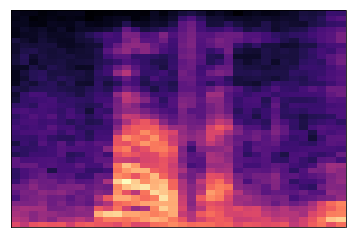

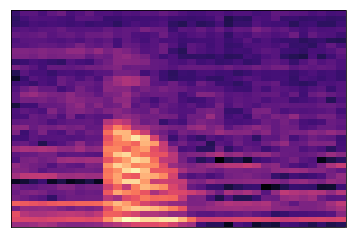

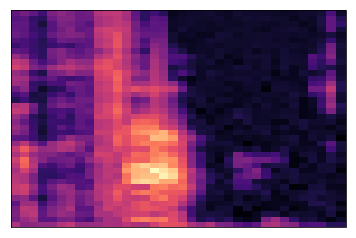

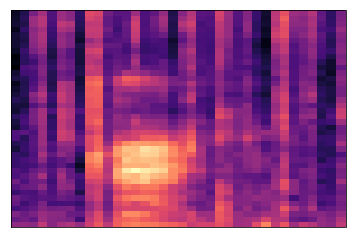

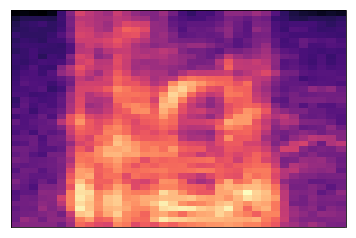

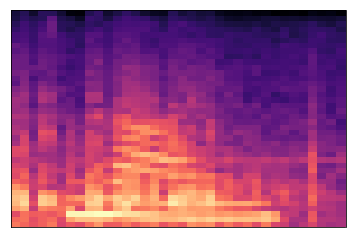

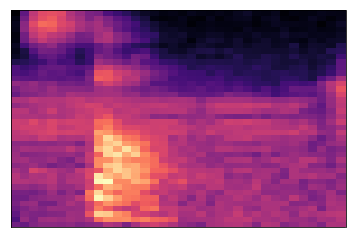

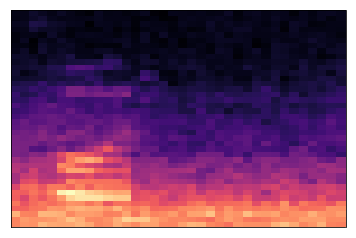

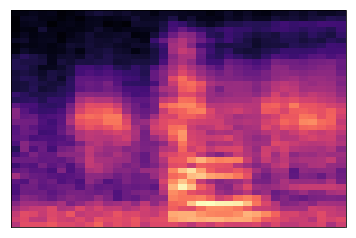

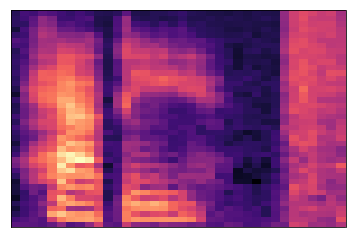

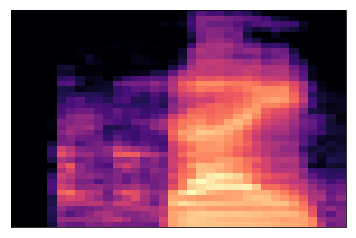

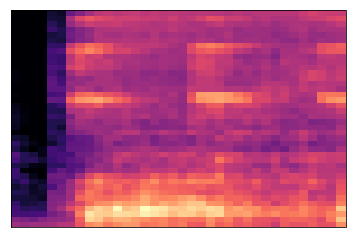

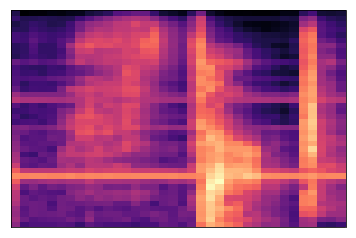

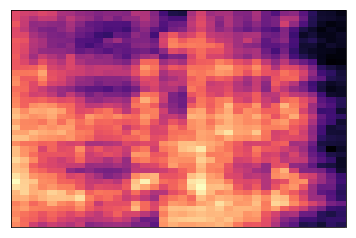

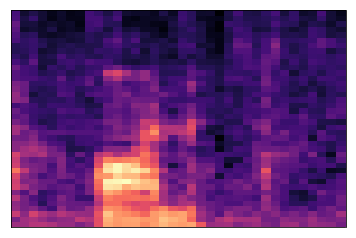

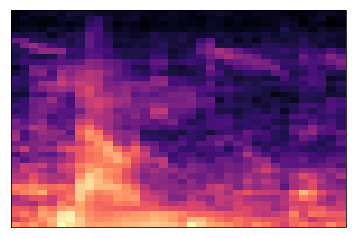

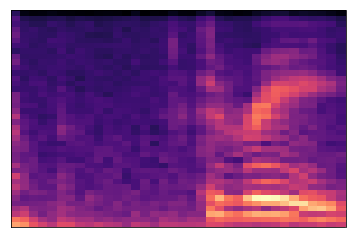

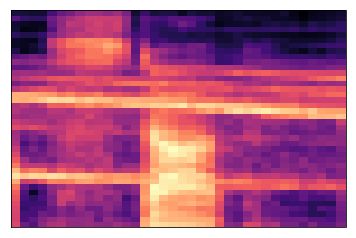

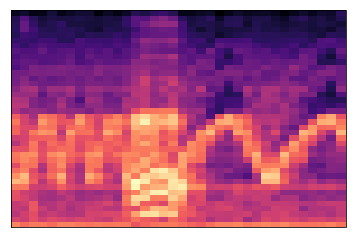

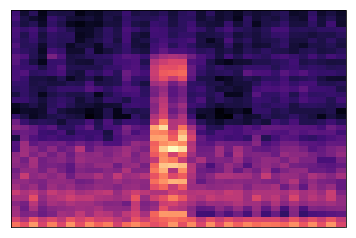

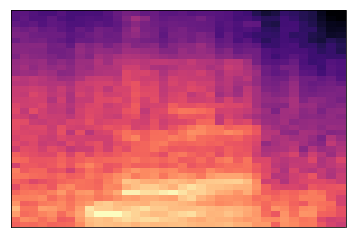

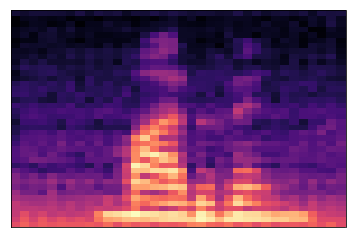

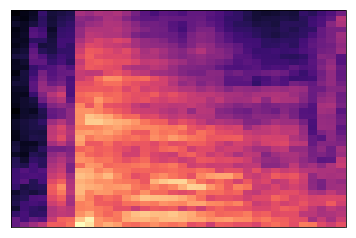

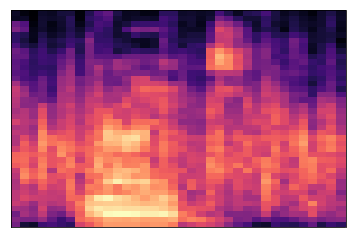

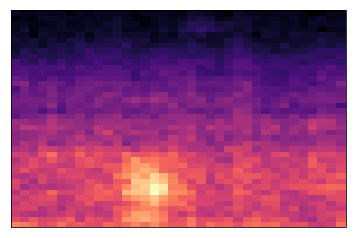

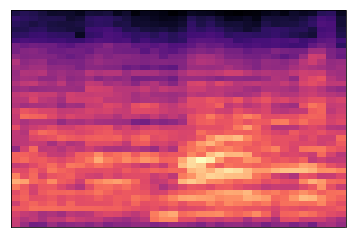

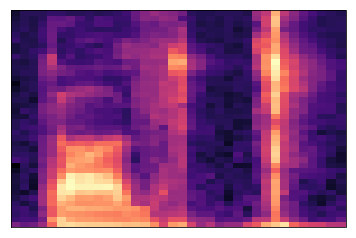

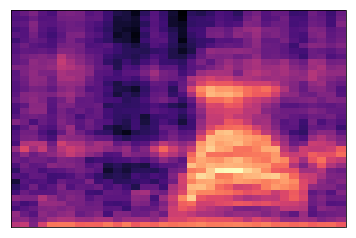

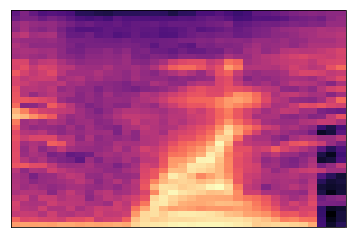

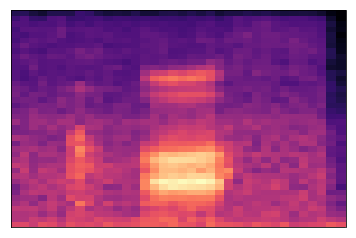

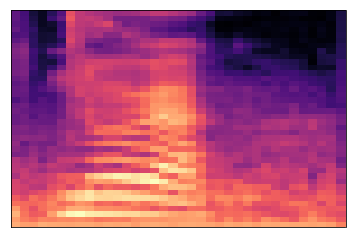

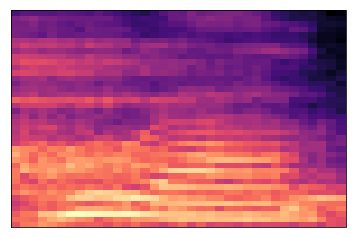

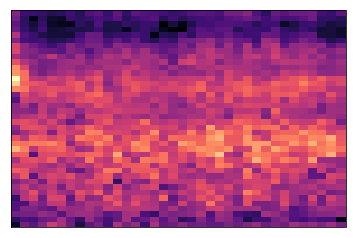

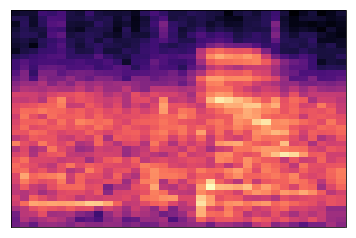

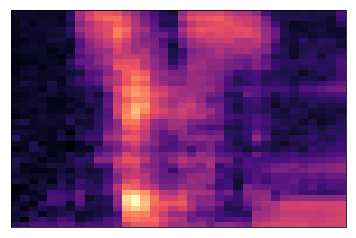

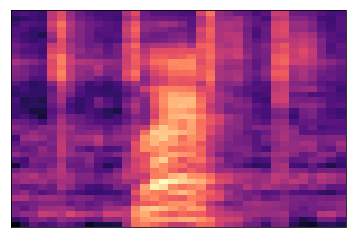

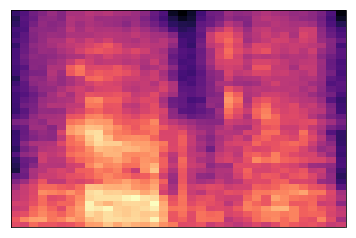

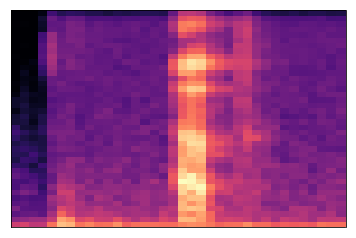

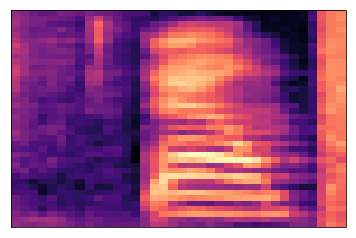

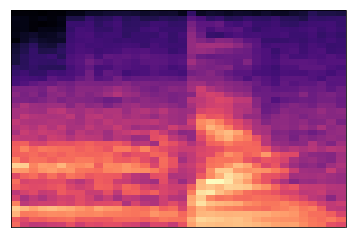

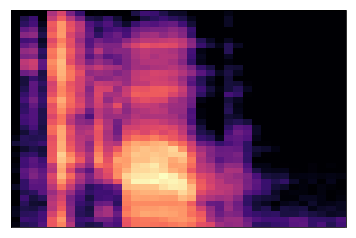

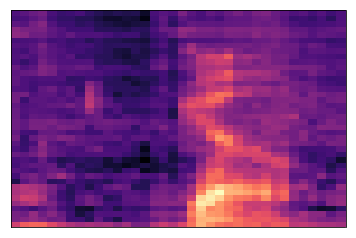

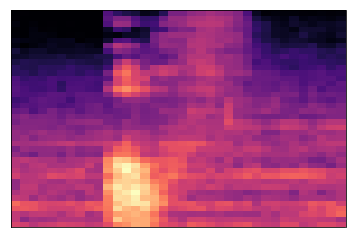

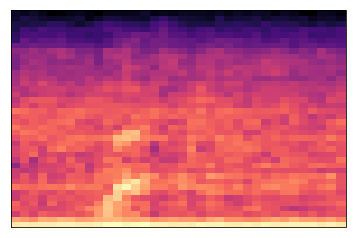

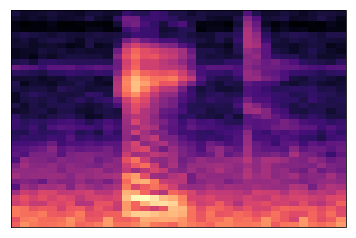

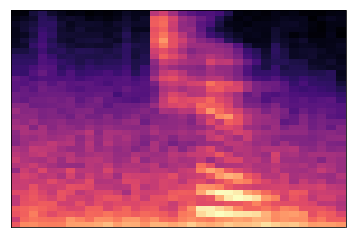

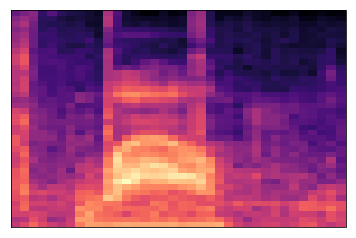

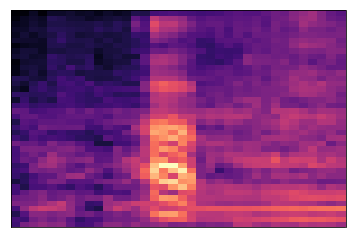

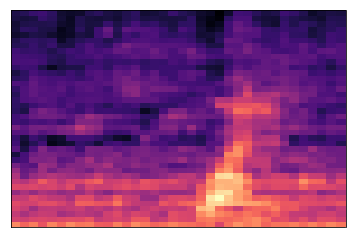

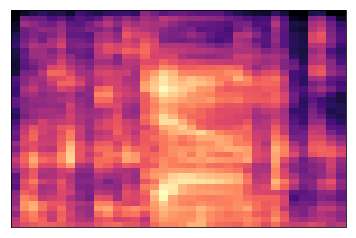

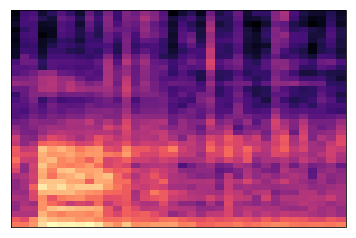

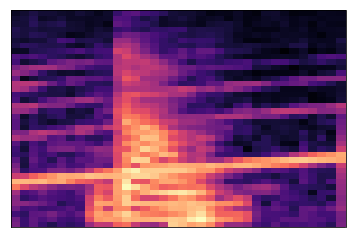

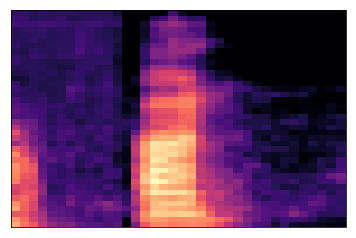

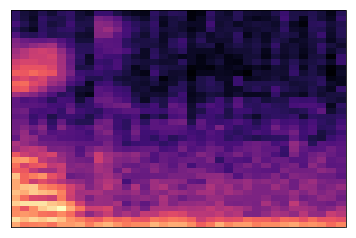

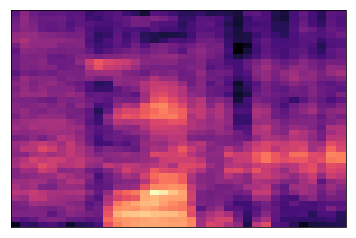

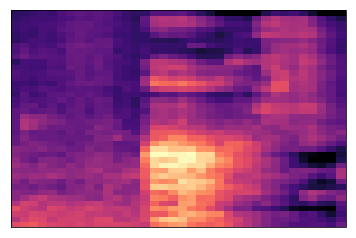

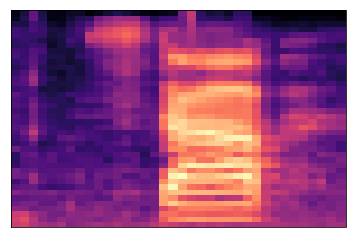

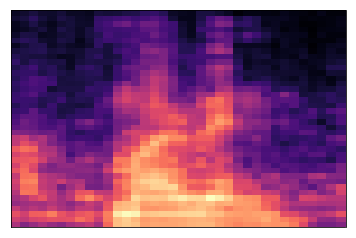

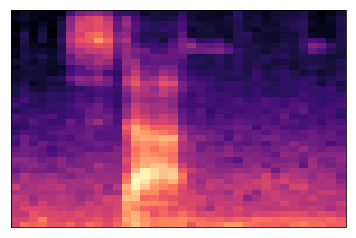

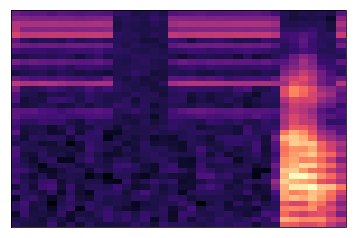

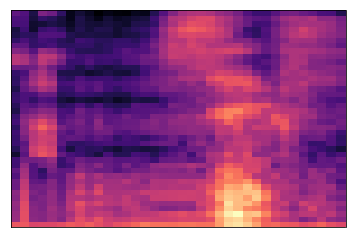

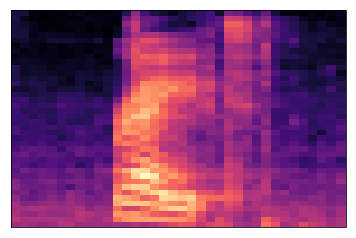

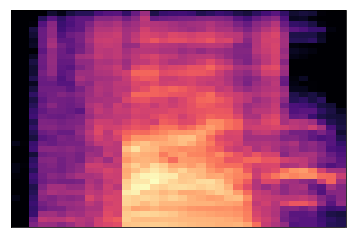

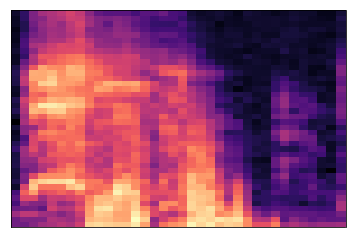

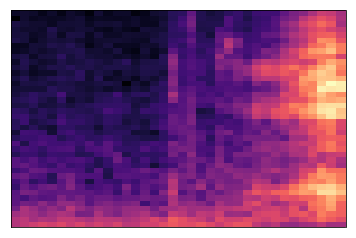

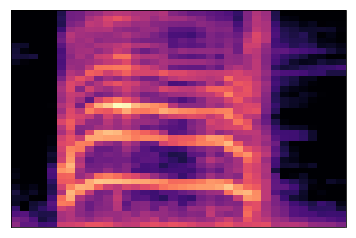

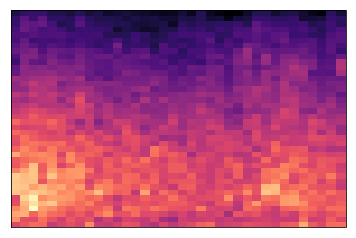

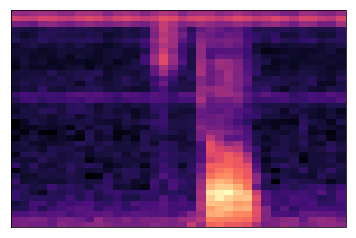

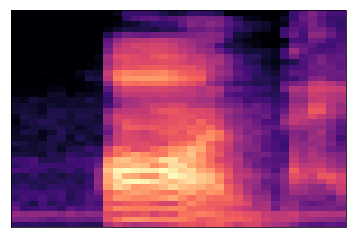

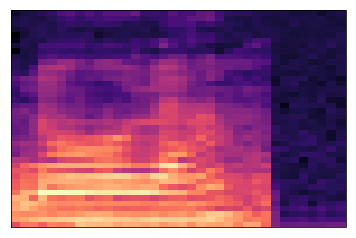

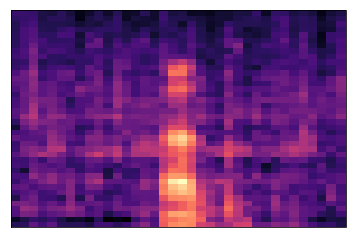

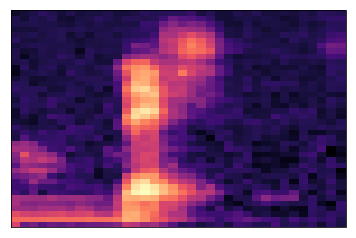

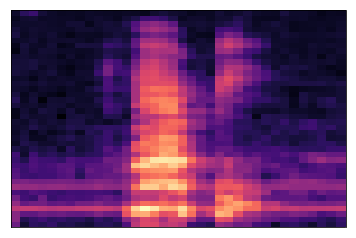

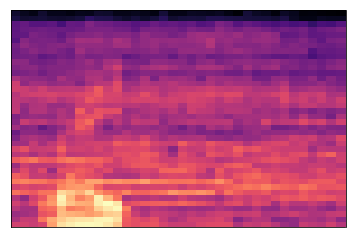

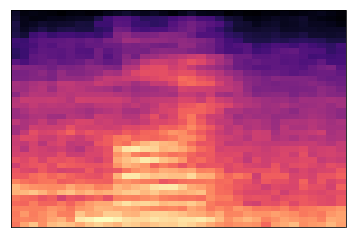

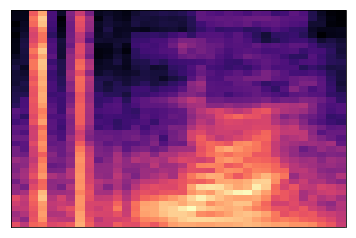

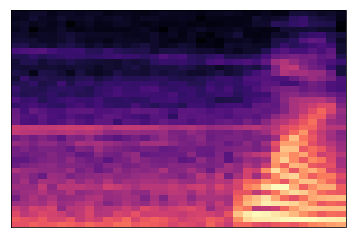

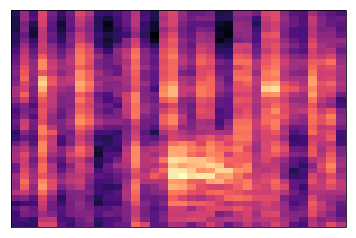

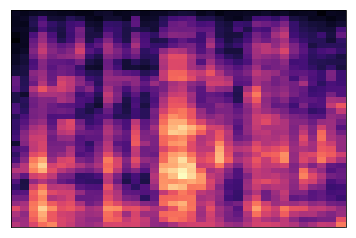

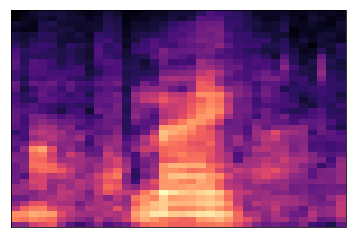

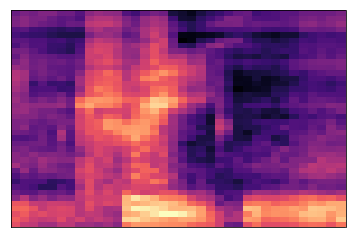

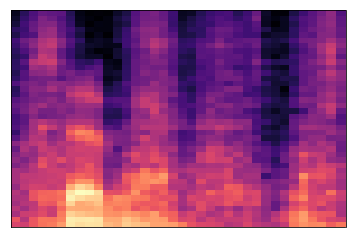

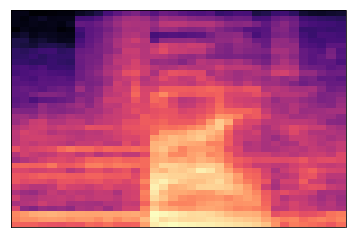

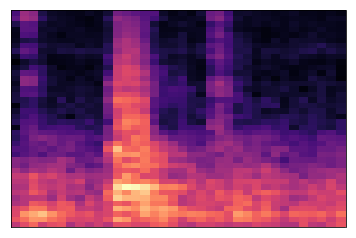

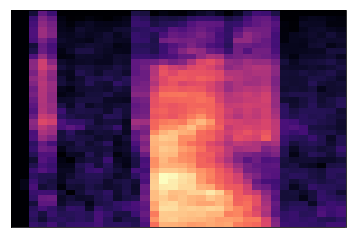

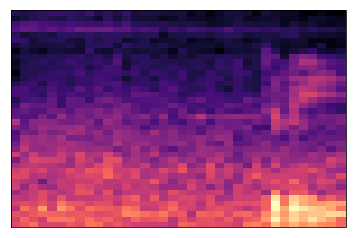

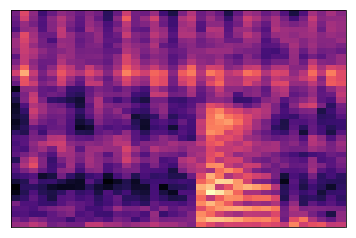

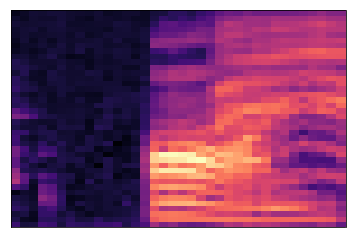

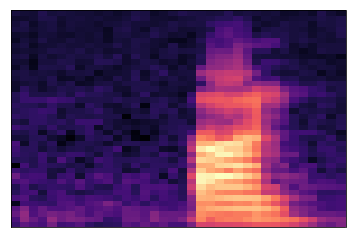

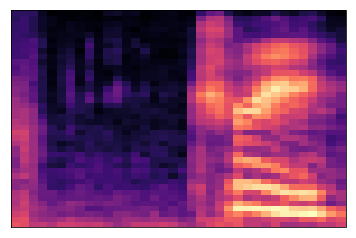

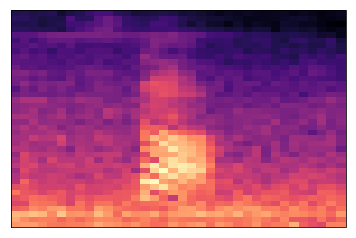

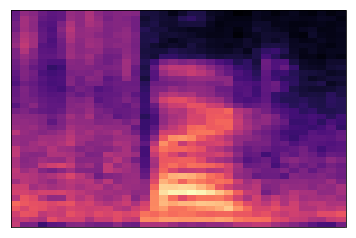

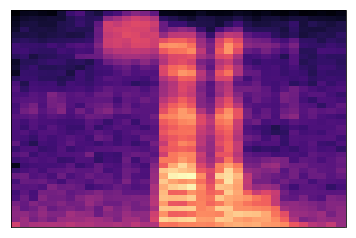

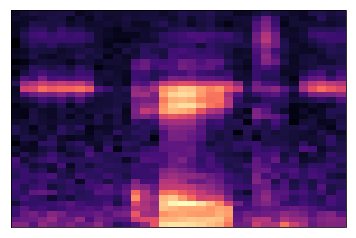

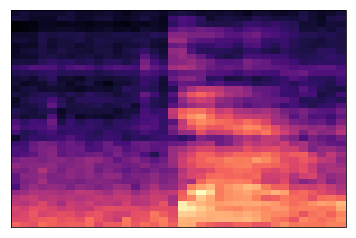

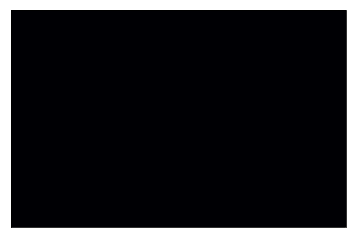

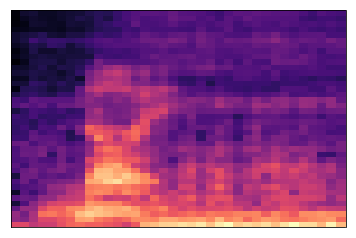

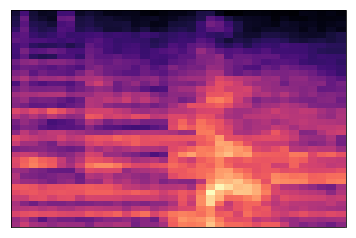

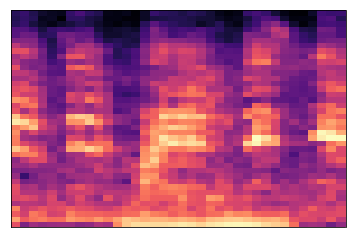

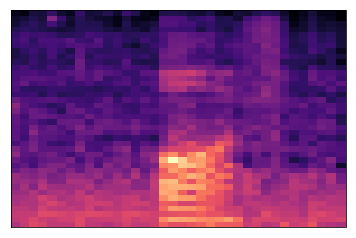

In [10]:
for i in range(5150,5250):
    librosa.display.specshow(X[i].reshape((36,40)).T)
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.25)

In [13]:
optimizer = Adam()
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer=optimizer,metrics=[sparse_categorical_accuracy])

In [14]:
def lr_schedule(epoch):
    
    if epoch <= 20000:
        return 0.00001
    else:
        return 0.000001

In [15]:
callbacks = [
    keras.callbacks.TensorBoard(log_dir='logs'),
    keras.callbacks.LearningRateScheduler(lr_schedule),
    keras.callbacks.ModelCheckpoint(save_best_only=False, filepath="chkpts/weights.epoch-{epoch:03d}.loss-{loss:.3f}.vloss-{val_loss:.3f}.acc-{sparse_categorical_accuracy:.3f}.vacc-{val_sparse_categorical_accuracy:.3f}.hdf5",save_weights_only=True)
]

In [16]:
model.load_weights("/home/lamar/Documents/workspace/multiverse/Nora/nora/kws/1000ms/cnn-trad-fpool3/var 3/chkpts/weights.epoch-104.loss-0.425.vloss-0.236.acc-0.860.vacc-0.926.hdf5")

In [ ]:
history = model.fit(batch_size=8,callbacks=callbacks,epochs=2000,validation_data=(XTest,YTest),x=XTrain,y=YTrain,shuffle=True,initial_epoch=104)

Train on 22476 samples, validate on 7492 samples
Epoch 105/2000
22476/22476 [==============================] - 1434s 64ms/sample - loss: 0.4491 - sparse_categorical_accuracy: 0.8522 - val_loss: 0.2197 - val_sparse_categorical_accuracy: 0.9334
Epoch 106/2000
22476/22476 [==============================] - 1341s 60ms/sample - loss: 0.4355 - sparse_categorical_accuracy: 0.8561 - val_loss: 0.1744 - val_sparse_categorical_accuracy: 0.9507
Epoch 107/2000
22476/22476 [==============================] - 1351s 60ms/sample - loss: 0.4392 - sparse_categorical_accuracy: 0.8548 - val_loss: 0.1980 - val_sparse_categorical_accuracy: 0.9426
Epoch 108/2000
22476/22476 [==============================] - 1444s 64ms/sample - loss: 0.4224 - sparse_categorical_accuracy: 0.8627 - val_loss: 0.2100 - val_sparse_categorical_accuracy: 0.9415
Epoch 109/2000
22476/22476 [==============================] - 1373s 61ms/sample - loss: 0.4148 - sparse_categorical_accuracy: 0.8659 - val_loss: 0.1857 - val_sparse_categorica